In [11]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    print("GPU details: ", details)



Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [13]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
import matplotlib.pyplot as plt

## Basic structure

In [23]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/All apples/Train'        # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/All apples/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   ##********** causing permission error
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5672 images belonging to 2 classes.
Found 1779 images belonging to 2 classes.


### 16+16 2 conv layed 1 max pooling ----- 32+32 and 1 pool ----- 64+64 and 1 pool === fully connected layer 
## kernal = (3,3) and Pooling = (2,2)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6431 - loss: 0.6203

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


177/177 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.6437 - loss: 0.6197 - val_accuracy: 0.8545 - val_loss: 0.4825
Epoch 2/30
  1/177 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.8750 - loss: 0.5917

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8750 - loss: 0.5917 - val_accuracy: 0.8568 - val_loss: 0.4722
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 36s 205ms/step - accuracy: 0.8874 - loss: 0.3006 - val_accuracy: 0.9062 - val_loss: 0.2294
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8438 - loss: 0.2486 - val_accuracy: 0.8972 - val_loss: 0.2632
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.9023 - loss: 0.2434 - val_accuracy: 0.9330 - val_loss: 0.1510
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9375 - loss: 0.1474 - val_accuracy: 0.9386 - val_loss: 0.1493
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 37s 210ms/step - accuracy: 0.9064 - loss: 0.2309 - val_accuracy: 0.9165 - val_loss: 0.2215
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9375 - loss: 0.2069 - val_accuracy: 0.9216 - val_loss: 0.2153
Epoch 9/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 36s 205ms/step - accuracy: 0.9260 - loss: 0.1907 - val_accurac

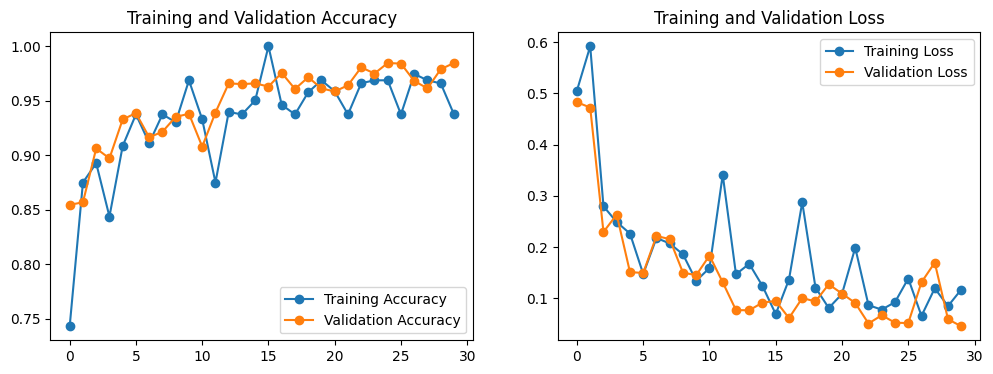

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9876 - loss: 0.0355
Test Accuracy: 98.48%
Test loss: 4.52%


In [27]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss * 100:.2f}%')

<h4 style="color:red">98.48% accuracy</h4>

# VGG ( finite tuning )

In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

# Load base model (excluding top layers)
base_model = VGG16(weights='imagenet', 
                   include_top=False,   # top excluded means fully connected layer removed
                   input_shape=(128, 128, 3))
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 42s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
# Unfreeze last convolutional block (block5)
for layer in base_model.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        layer.trainable = True

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

### importing data

In [54]:
# Define image parameters
img_height, img_width = 128,128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/All apples/Train'        # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/All apples/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   ##********** causing permission error
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    # brightness_range=[0.7, 1.3],
    fill_mode='nearest'       # Fill strategy for new pixels
    
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5672 images belonging to 2 classes.
Found 1779 images belonging to 2 classes.


In [56]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator_all.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 9,177,346 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 103s 551ms/step - accuracy: 0.5438 - loss: 1.1313 - val_accuracy: 0.5574 - val_loss: 0.6873
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.6250 - loss: 0.6612 - val_accuracy: 0.5551 - val_loss: 0.6880
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 101s 570ms/step - accuracy: 0.5740 - loss: 0.6827 - val_accuracy: 0.5562 - val_loss: 0.6871
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.4688 - loss: 0.7132 - val_accuracy: 0.5562 - val_loss: 0.6871
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 98s 554ms/step - accuracy: 0.5890 - loss: 0.6789 - val_accuracy: 0.5551 - val_loss: 0.6873
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.5000 - loss: 0.7053 - val_accuracy: 0.5551 - val_loss: 0.6873
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 103s 577ms/step - accuracy: 0.5645 - loss: 0.6850 - val_accuracy: 0.5551 - val_loss: 0.6881
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.6562 - loss

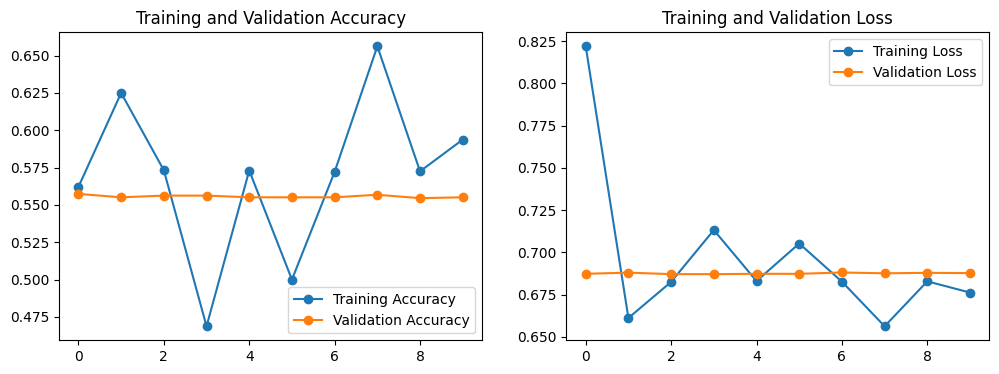

56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 357ms/step - accuracy: 0.5734 - loss: 0.6823
Test Accuracy: 55.54%
Test loss: 68.77%


In [58]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=10,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss * 100:.2f}%')

### Changing fully connected layer

In [64]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))
model.add(Dense(512, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))
model.add(Dense(train_generator_all.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,630,146 (90.14 MB)

 Trainable params: 15,994,882 (61.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 116s 641ms/step - accuracy: 0.5783 - loss: 0.6835 - val_accuracy: 0.5562 - val_loss: 0.6876
Epoch 2/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.4688 - loss: 0.7122 - val_accuracy: 0.5545 - val_loss: 0.6881
Epoch 3/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 112s 631ms/step - accuracy: 0.5797 - loss: 0.6811 - val_accuracy: 0.5545 - val_loss: 0.6873
Epoch 4/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - accuracy: 0.5938 - loss: 0.6748 - val_accuracy: 0.5551 - val_loss: 0.6871
Epoch 5/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 116s 654ms/step - accuracy: 0.5752 - loss: 0.6826 - val_accuracy: 0.5568 - val_loss: 0.6867
Epoch 6/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.5938 - loss: 0.6764 - val_accuracy: 0.5562 - val_loss: 0.6869
Epoch 7/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 114s 644ms/step - accuracy: 0.5770 - loss: 0.6826 - val_accuracy: 0.5534 - val_loss: 0.6878
Epoch 8/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.5312 - loss

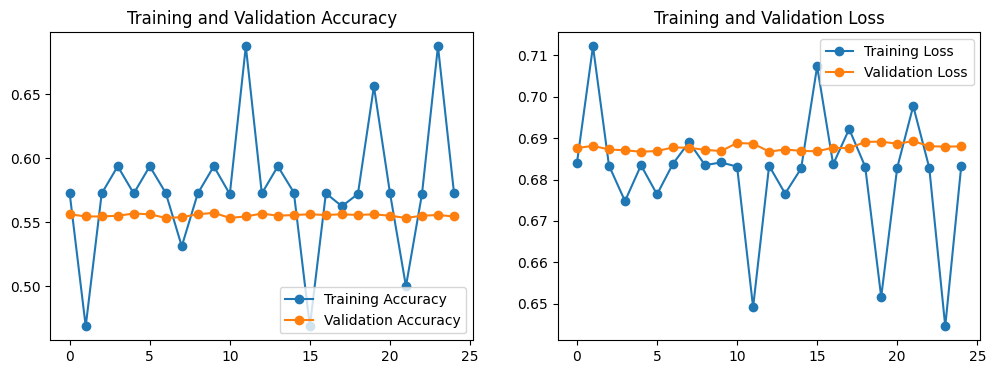

56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.5662 - loss: 0.6845
Test Accuracy: 55.54%
Test loss: 68.78%


In [66]:
# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=25,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss * 100:.2f}%')